In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('transaction_clean.csv')
df.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [ ]:
df.describe()

,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.338460e+05,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000
mean,5.547627e+08,10698.515097,6652.950985,135.190636,9.132774,3.240931,557.125758,556.695816,4885.630939,4045.564111
std,2.547414e+08,11462.466156,9229.448103,147.095318,16.953886,9.693157,257.307445,257.384997,2859.073597,5946.767669
min,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,5000.000000,1115.890000,32.320000,2.000000,1.000000,334.000000,333.000000,2362.000000,503.430000
50%,5.438879e+08,7500.000000,3578.050000,85.820000,5.000000,1.000000,581.000000,579.500000,4873.000000,2153.300000
75%,7.865589e+08,15000.000000,8161.842500,189.050000,9.000000,1.000000,761.000000,761.000000,7267.000000,5006.667500
max,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


<AxesSubplot:xlabel='creditLimit', ylabel='count'>

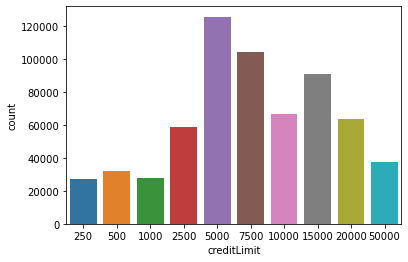

In [ ]:
#visualization
sns.countplot(data=df,x="creditLimit")

<AxesSubplot:ylabel='Frequency'>

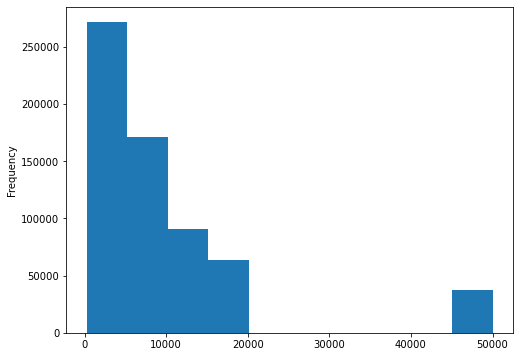

In [ ]:
#View Outliers
df["creditLimit"].plot.hist(bins=10, figsize=(8,6))

<AxesSubplot:xlabel='creditLimit'>

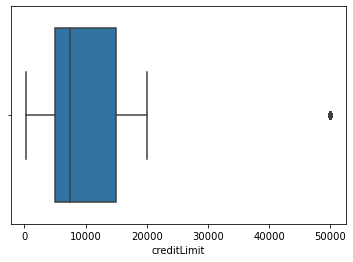

In [ ]:
sns.boxplot(data=df,x="creditLimit")

In [ ]:
#Menghitung Quartil 1 dan Quartil 3 dari "creditLimit"
q1_cl,q3_cl=np.percentile(df['creditLimit'],[25,75])
print(q1_cl)
print(q3_cl)

5000.0
15000.0


In [ ]:
#Menghitung nilai IQR dari "credilLimit"
iqr_cl=q3_cl-q1_cl
iqr_cl

10000.0

In [ ]:
#Menghitung Batas Atas dan Batas Bawah dari "creditLimit"
ba_cl=q3_cl+(1.5*iqr_cl)
bw_cl=q1_cl-(1.5*iqr_cl)
print(ba_cl)
print(bw_cl)

30000.0
-10000.0


In [ ]:
#Menampilkan nilai outlier dari "creditLimit"
outlier_cl=df[(df['creditLimit']<bw_cl) | (df['creditLimit']>ba_cl)]
outlier_cl

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
559,223895414,50000,49855.96,2016-01-12 00:43:13,150.31,1st Deli,US,US,9.0,1.0,...,2014-05-31,2014-05-31,905,905,580,PURCHASE,False,144.04,True,False
560,223895414,50000,49705.65,2016-01-18 02:45:54,284.96,South Steakhouse #73819,US,US,2.0,1.0,...,2014-05-31,2014-05-31,671,671,2849,PURCHASE,False,294.35,True,False
561,223895414,50000,49445.69,2016-02-02 12:45:21,113.24,Dinosaur Sandwitch Bar #249717,US,US,2.0,1.0,...,2014-05-31,2014-05-31,905,905,580,PURCHASE,False,554.31,True,False
562,223895414,50000,49332.45,2016-02-13 21:34:29,246.26,Regal Cinemas #05791,US,US,2.0,8.0,...,2014-05-31,2014-05-31,671,671,2849,PURCHASE,False,667.55,True,False
563,223895414,50000,49086.19,2016-02-20 20:13:34,49.58,South Drive in,US,US,5.0,1.0,...,2014-05-31,2014-05-31,905,905,580,PURCHASE,False,913.81,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633783,455115932,50000,27691.72,2016-12-22 19:37:04,51.42,Fresh Flowers,US,US,2.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22308.28,False,False
633784,455115932,50000,27640.30,2016-12-23 04:30:15,105.43,Fresh Online Services,US,US,9.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22359.70,False,False
633785,455115932,50000,27534.87,2016-12-27 05:23:27,43.05,Shell Gas #988905,US,US,5.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22465.13,True,False
633786,455115932,50000,27491.82,2016-12-29 22:27:46,5.93,Next Day eCards,US,US,5.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22508.18,False,False


<AxesSubplot:ylabel='Frequency'>

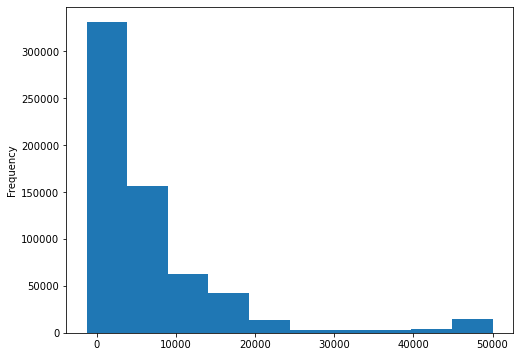

In [ ]:
#View Outliers
df["availableMoney"].plot.hist(bins=10, figsize=(8,6))

In [ ]:
#Menghitung nilai Q1 dan Q3 dari "availableMoney"
q1_am,q3_am=np.percentile(df['availableMoney'],[25,75])
print(q1_am)
print(q3_am)

1115.89
8161.842500000001


In [ ]:
#Menghitung nilai IQR dari "availableMoney"
iqr_am=q3_am-q1_am
iqr_am

7045.9525

In [ ]:
#Menghitung nilai batas atas dan batas bawah dari "availableMoney"
ba_am=q3_am+(1.5*iqr_am)
bw_am=q1_am-(1.5*iqr_am)
print(ba_am)
print(bw_am)

18730.77125
-9453.038750000002


In [ ]:
#Menampilkan Outlier dari "availableMoney"
outlier_am=df[(df['availableMoney']<bw_am) | (df['availableMoney']>ba_am)]
outlier_am

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
450,523868625,20000,20000.00,2016-02-27 07:54:30,3.29,Apple iTunes,US,US,9.0,1.0,...,2012-12-01,2012-12-01,687,687,3332,PURCHASE,False,0.00,False,False
451,523868625,20000,20000.00,2016-03-30 06:31:36,3.29,Apple iTunes,US,US,9.0,1.0,...,2012-12-01,2012-12-01,687,687,3332,PURCHASE,False,0.00,False,False
452,523868625,20000,20000.00,2016-04-30 05:07:49,3.29,Apple iTunes,US,US,9.0,1.0,...,2012-12-01,2012-12-01,687,687,3332,PURCHASE,False,0.00,False,False
453,523868625,20000,20000.00,2016-05-31 22:00:43,3.29,Apple iTunes,US,US,9.0,1.0,...,2012-12-01,2012-12-01,687,687,3332,PURCHASE,False,0.00,False,False
454,523868625,20000,20000.00,2016-07-02 11:35:59,3.29,Apple iTunes,US,US,9.0,1.0,...,2012-12-01,2012-12-01,687,687,3332,PURCHASE,False,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633783,455115932,50000,27691.72,2016-12-22 19:37:04,51.42,Fresh Flowers,US,US,2.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22308.28,False,False
633784,455115932,50000,27640.30,2016-12-23 04:30:15,105.43,Fresh Online Services,US,US,9.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22359.70,False,False
633785,455115932,50000,27534.87,2016-12-27 05:23:27,43.05,Shell Gas #988905,US,US,5.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22465.13,True,False
633786,455115932,50000,27491.82,2016-12-29 22:27:46,5.93,Next Day eCards,US,US,5.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22508.18,False,False


<AxesSubplot:ylabel='Frequency'>

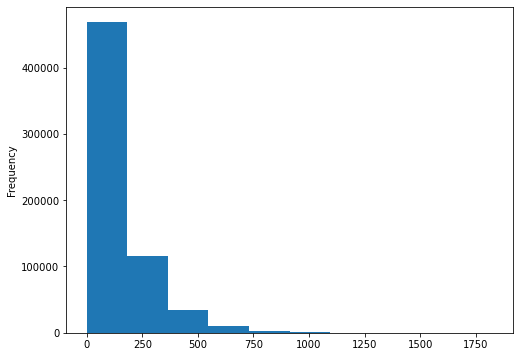

In [ ]:
#View Outliers
df["transactionAmount"].plot.hist(bins=10, figsize=(8,6))

In [ ]:
#Menghitung nilai Q1 dan Q3 dari "transactionAmount"
q1_ta,q3_ta=np.percentile(df['transactionAmount'],[25,75])
print(q1_ta)
print(q3_ta)

32.32
189.05


In [ ]:
#Menghitung nilai IQR dari "transactionAmount"
iqr_ta=q3_ta-q1_ta
iqr_ta

156.73000000000002

In [ ]:
#Menghitung nilai batas atas dan batas bawah dari "transactionAmount"
ba_ta=q3_ta+(1.5*iqr_ta)
bw_ta=q1_ta-(1.5*iqr_ta)
print(ba_ta)
print(bw_ta)

424.14500000000004
-202.77500000000003


In [ ]:
#Menampilkan Outlier dari "transactionAmount"
outlier_ta=df[(df['transactionAmount']<bw_ta) | (df['transactionAmount']>ba_ta)]
outlier_ta

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
20,733493772,5000,3488.04,2016-02-23 13:04:35,467.88,Uber,US,US,9.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,1511.96,False,False
21,733493772,5000,3020.16,2016-02-23 13:05:35,467.88,Uber,US,US,9.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,REVERSAL,False,1979.84,False,False
47,733493772,5000,1241.65,2016-05-01 17:42:54,464.01,Dunkin' Donuts #48174,US,US,9.0,8.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,3758.35,True,False
78,733493772,5000,2394.36,2016-06-16 06:43:35,665.84,Lyft,US,US,2.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,2605.64,False,False
82,733493772,5000,1576.12,2016-06-20 13:51:35,665.21,Uber,US,US,2.0,1.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,3423.88,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633760,455115932,50000,30502.66,2016-11-11 06:38:59,530.42,Mobile eCards,US,US,5.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,19497.34,False,False
633798,186770399,7500,7377.86,2016-03-24 06:27:02,664.63,Fresh eCards,US,US,5.0,1.0,...,2015-11-04,2015-11-04,127,127,5432,PURCHASE,False,122.14,False,False
633805,186770399,7500,6287.79,2016-05-28 14:55:58,550.89,Next Day eCards,US,US,5.0,1.0,...,2015-11-04,2015-11-04,127,127,5432,PURCHASE,False,1212.21,False,False
633825,186770399,7500,4855.72,2016-09-06 03:11:56,463.33,Next Day Online Services,US,US,5.0,1.0,...,2015-11-04,2016-06-03,127,127,5432,PURCHASE,False,2644.28,False,False


<AxesSubplot:ylabel='Frequency'>

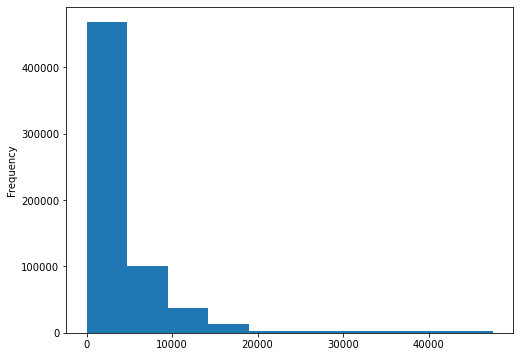

In [ ]:
#View Outliers
df["currentBalance"].plot.hist(bins=10, figsize=(8,6))

In [ ]:
#Menghitung nilai Q1 dan Q3 dari "currentBalance"
q1_cb,q3_cb=np.percentile(df['currentBalance'],[25,75])
print(q1_cb)
print(q3_cb)

503.43
5006.6675000000005


In [ ]:
#Menghitung nilai IQR dari "currentBalance"
iqr_cb=q3_cb-q1_cb
iqr_cb

4503.2375

In [ ]:
#Menghitung nilai batas atas dan batas bawah dari "currentBalance"
ba_cb=q3_cb+(1.5*iqr_cb)
bw_cb=q1_cb-(1.5*iqr_cb)
print(ba_cb)
print(bw_cb)

11761.52375
-6251.42625


In [ ]:
#Menampilkan Outlier dari "currentBalance"
outlier_cb=df[(df['currentBalance']<bw_cb) | (df['currentBalance']>ba_cb)]
outlier_cb

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
1759,782400169,15000,3180.18,2016-03-06 14:01:50,8.37,NY Deli,US,US,9.0,1.0,...,2012-12-31,2012-12-31,298,298,6964,PURCHASE,False,11819.82,True,False
1760,782400169,15000,3171.81,2016-03-06 14:24:48,68.11,South Steakhouse #335249,US,US,9.0,8.0,...,2012-12-31,2012-12-31,978,978,5055,PURCHASE,False,11828.19,True,False
1761,782400169,15000,3103.70,2016-03-06 23:24:33,14.27,South Steakhouse #157238,US,US,9.0,1.0,...,2012-12-31,2012-12-31,978,978,5055,PURCHASE,False,11896.30,True,False
1762,782400169,15000,3089.43,2016-03-09 04:25:17,104.67,34th BBQ #493821,US,US,5.0,1.0,...,2012-12-31,2012-12-31,298,298,6964,PURCHASE,False,11910.57,True,False
1763,782400169,15000,2984.76,2016-03-10 07:25:39,133.98,Dinosaur Sandwitch Bar #960325,US,US,80.0,1.0,...,2012-12-31,2012-12-31,298,298,6964,PURCHASE,False,12015.24,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633783,455115932,50000,27691.72,2016-12-22 19:37:04,51.42,Fresh Flowers,US,US,2.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22308.28,False,False
633784,455115932,50000,27640.30,2016-12-23 04:30:15,105.43,Fresh Online Services,US,US,9.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22359.70,False,False
633785,455115932,50000,27534.87,2016-12-27 05:23:27,43.05,Shell Gas #988905,US,US,5.0,8.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22465.13,True,False
633786,455115932,50000,27491.82,2016-12-29 22:27:46,5.93,Next Day eCards,US,US,5.0,1.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,False,22508.18,False,False


In [ ]:
df['transactionDateTime']=pd.to_datetime(df['transactionDateTime'])
df['dateOfLastAddressChange']=pd.to_datetime(df['dateOfLastAddressChange'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                633846 non-null  int64         
 1   creditLimit               633846 non-null  int64         
 2   availableMoney            633846 non-null  float64       
 3   transactionDateTime       633846 non-null  datetime64[ns]
 4   transactionAmount         633846 non-null  float64       
 5   merchantName              633846 non-null  object        
 6   acqCountry                633846 non-null  object        
 7   merchantCountryCode       633846 non-null  object        
 8   posEntryMode              633846 non-null  float64       
 9   posConditionCode          633846 non-null  float64       
 10  merchantCategoryCode      633846 non-null  object        
 11  currentExpDate            633846 non-null  object        
 12  ac

In [ ]:
import scipy.stats
from scipy.stats import chi2

## Feature Importance

We utilised feature importance process by using chi-square method to find relations between variables and its target

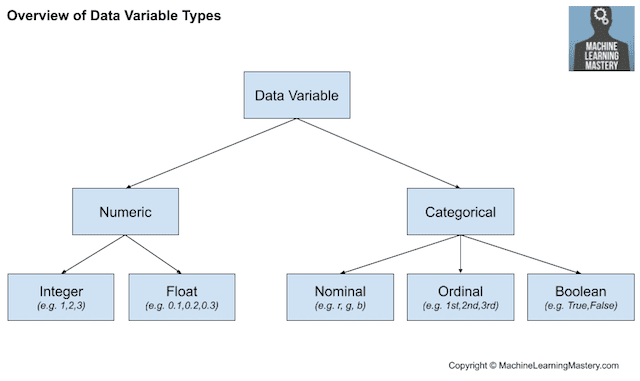

In [ ]:
icol = []

col_critical=[]
col_alpha=[]

icol = []
icol_alpha = []
icol_p_value = []
icol_chi_square_statistic = []
icol_critical_value = []
icol_df = []

In [ ]:
def chisq(var, ds):
    icol.append(var)
    
    contingency_table=pd.crosstab(ds[var],ds["isFraud"])
#     print('contingency_table :-\n',contingency_table, '\n')

    #Observed Values
    Observed_Values = contingency_table.values 
#     print("Observed Values :-\n",Observed_Values, '\n')

    #Expected Values
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
#     print("Expected Values :-\n",Expected_Values, '\n')

    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    # print("Degree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05

    #chi-square statistic - χ2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    # print("chi-square statistic:-",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    # print('critical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    # print('p-value:',p_value)
    
    print('var : '+var)

    print('Significance level: ',alpha)
    print('p-value:',p_value, '\n')
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value, '\n')
    print('Degree of Freedom: ',df)
    
    icol_alpha.append(alpha)
    icol_p_value.append(p_value)
    icol_chi_square_statistic.append(chi_square_statistic)
    icol_critical_value.append(critical_value)
    icol_df.append(df)

    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    print('Conclusion for '+var+' variable')
    if chi_square_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
        col_critical.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value <= alpha:
        print("Reject H0,There is a relationship between 2 categorical variables \n")
        col_alpha.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables \n")
        
def chisquare(ds):
    for i in ds.columns:
        if (i!='isFraud'):

            chisq(i,ds)

    print(col_critical)
    print(col_alpha)

    # dictionary with list object in values
    details = {
        'var' : icol,
        'alpha' : icol_alpha,
        'pvalue' : icol_p_value,
        'chi_square_statistic' : icol_chi_square_statistic,
        'critical_value' : icol_critical_value,
        'degreefreedom' : icol_df
    }

    print(len(icol))
    print(len(icol_alpha))
    print(len(icol_p_value))
    print(len(icol_chi_square_statistic))
    print(len(icol_critical_value))
    print(len(icol_df))

    # creating a Dataframe object 
    feature = pd.DataFrame(details)

    feature['relation_chisq_critical'] = np.where(feature['chi_square_statistic']>= feature['critical_value'], 'Good', 'No Relation')
    feature['relation_pval_alpha'] = np.where(feature['pvalue'] <= feature['alpha'], 'Good', 'No Relation')


    return feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                633846 non-null  int64         
 1   creditLimit               633846 non-null  int64         
 2   availableMoney            633846 non-null  float64       
 3   transactionDateTime       633846 non-null  datetime64[ns]
 4   transactionAmount         633846 non-null  float64       
 5   merchantName              633846 non-null  object        
 6   acqCountry                633846 non-null  object        
 7   merchantCountryCode       633846 non-null  object        
 8   posEntryMode              633846 non-null  float64       
 9   posConditionCode          633846 non-null  float64       
 10  merchantCategoryCode      633846 non-null  object        
 11  currentExpDate            633846 non-null  object        
 12  ac

In [ ]:
df['cardPresent'].value_counts().sort_values(ascending=False)

False    336201
True     297645
Name: cardPresent, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoded=df.copy()

In [ ]:
s = (encoded.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    encoded[i]=encoded[[i]].apply(LE.fit_transform)
    
print("All features are now numerical!")

Categorical variables in the dataset: ['merchantName', 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'transactionType']
All features are now numerical!


In [ ]:
c=chisquare(encoded)

var : customerId
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 16666.273220809875
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for customerId variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : creditLimit
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 96.79620490451443
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for creditLimit variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : availableMoney
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 460906.93586927216
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for availableMoney variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : transac

In [ ]:
c

,var,alpha,pvalue,chi_square_statistic,critical_value,degreefreedom,relation_chisq_critical,relation_pval_alpha
0,customerId,0.05,0.000000,16666.273221,3.841459,1,Good,Good
1,creditLimit,0.05,0.000000,96.796205,3.841459,1,Good,Good
2,availableMoney,0.05,0.000000,460906.935869,3.841459,1,Good,Good
3,transactionDateTime,0.05,0.000000,628013.696343,3.841459,1,Good,Good
4,transactionAmount,0.05,0.000000,124300.090262,3.841459,1,Good,Good
5,merchantName,0.05,0.000000,6910.742063,3.841459,1,Good,Good
6,acqCountry,0.05,0.000013,18.968985,3.841459,1,Good,Good
7,merchantCountryCode,0.05,0.000003,22.128788,3.841459,1,Good,Good
8,posEntryMode,0.05,0.000000,2521.630264,3.841459,1,Good,Good
9,posConditionCode,0.05,0.000000,235.272523,3.841459,1,Good,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                633846 non-null  int64         
 1   creditLimit               633846 non-null  int64         
 2   availableMoney            633846 non-null  float64       
 3   transactionDateTime       633846 non-null  datetime64[ns]
 4   transactionAmount         633846 non-null  float64       
 5   merchantName              633846 non-null  object        
 6   acqCountry                633846 non-null  object        
 7   merchantCountryCode       633846 non-null  object        
 8   posEntryMode              633846 non-null  float64       
 9   posConditionCode          633846 non-null  float64       
 10  merchantCategoryCode      633846 non-null  object        
 11  currentExpDate            633846 non-null  object        
 12  ac

In [ ]:
cols_del = ['customerId', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'expirationDateKeyInMatch']
encoded = encoded.drop(cols_del, axis=1)

In [ ]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633846 entries, 0 to 633845
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   creditLimit              633846 non-null  int64         
 1   availableMoney           633846 non-null  float64       
 2   transactionDateTime      633846 non-null  datetime64[ns]
 3   transactionAmount        633846 non-null  float64       
 4   merchantName             633846 non-null  int32         
 5   acqCountry               633846 non-null  int32         
 6   merchantCountryCode      633846 non-null  int32         
 7   posEntryMode             633846 non-null  float64       
 8   posConditionCode         633846 non-null  float64       
 9   merchantCategoryCode     633846 non-null  int32         
 10  currentExpDate           633846 non-null  int32         
 11  accountOpenDate          633846 non-null  int32         
 12  dateOfLastAddres

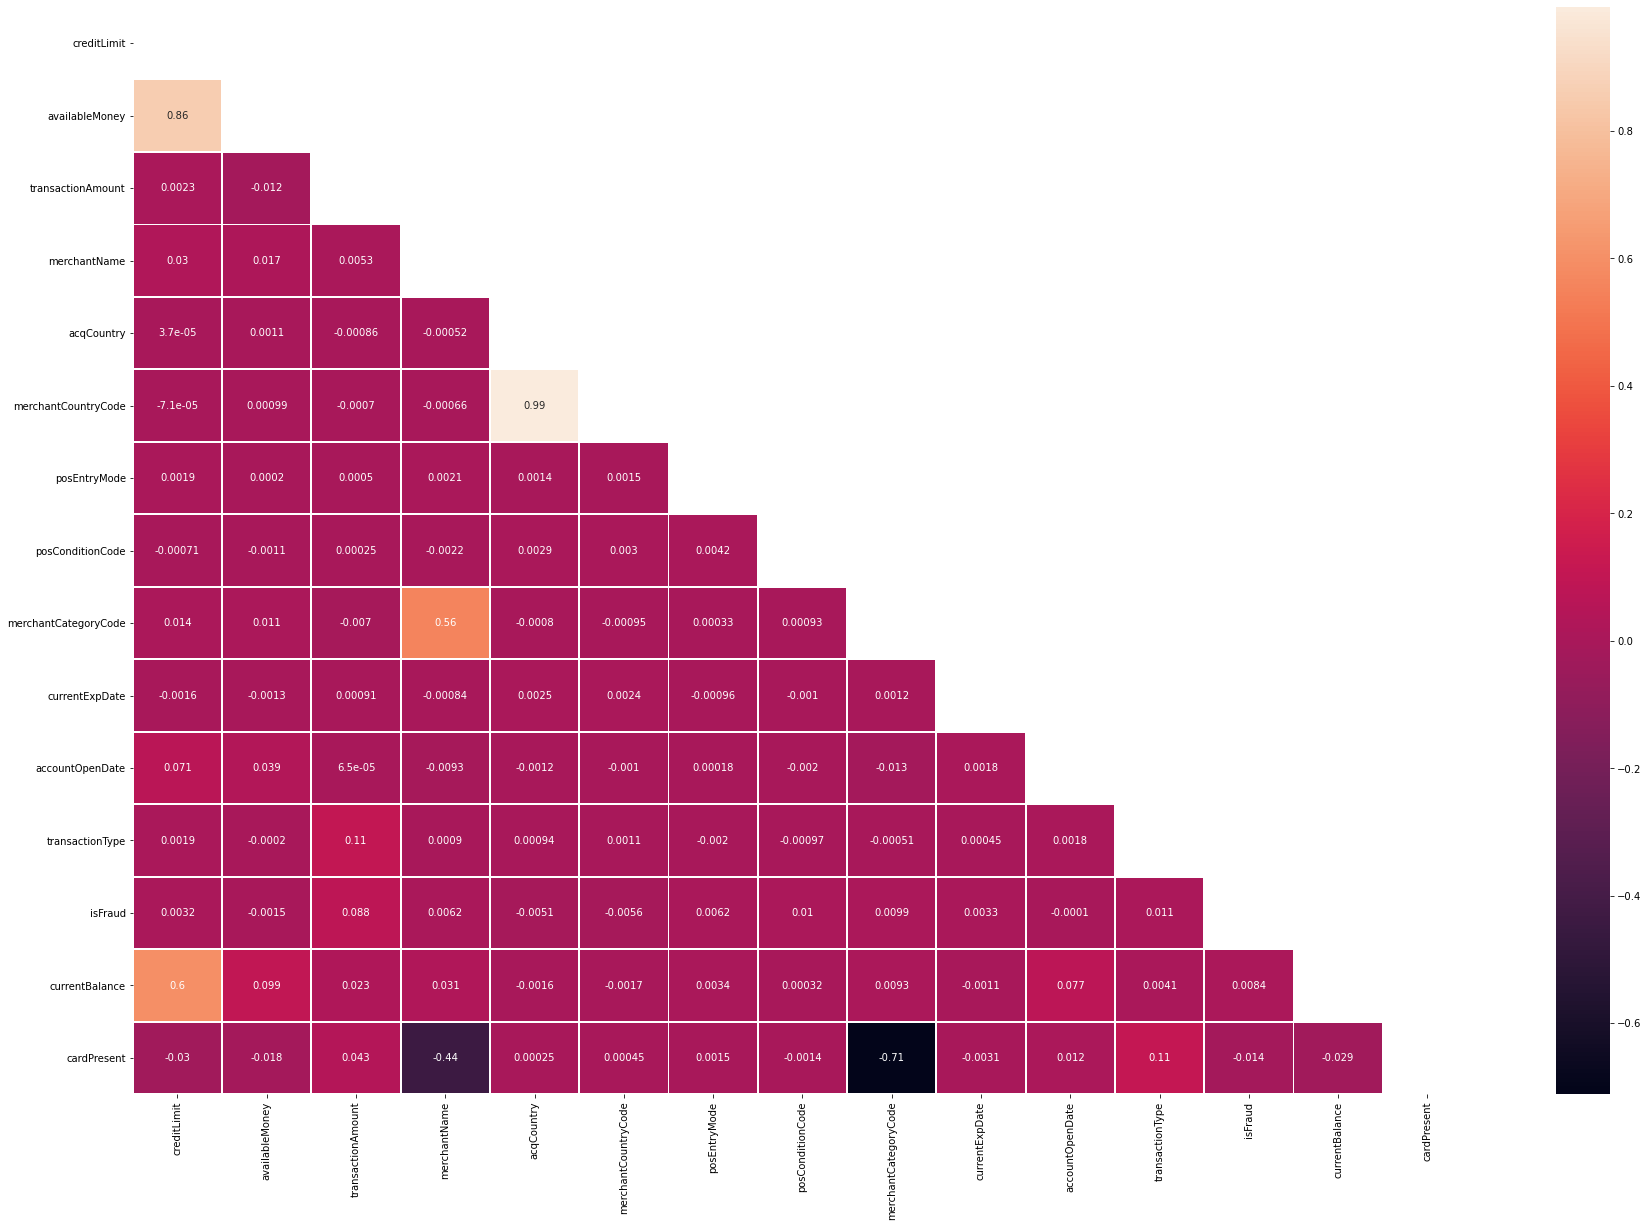

In [ ]:
plt.figure(figsize=(30, 20))
matrix = np.triu(encoded.corr())
sns.heatmap(encoded.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

## Modelling
in this section, Machine Learning method is performed to acknowledge the significance variable that affecting the target variable which here is 'isFraud'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

there is an imbalance between the data of isFraud 0 and 1, therefore upsampling is needed to make it on the same level amount of data

In [ ]:
#create two different dataframe of majority and minority class 
df_majority = encoded[(encoded['isFraud']==0)] 
df_minority = encoded[(encoded['isFraud']==1)] 

df_majority.shape,df_minority.shape

((622954, 17), (10892, 17))

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 622954, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(622954, 17)

In [ ]:
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(1245908, 17)

In [ ]:
total_upsampled['transactionday']=total_upsampled["transactionDateTime"].dt.dayofweek
total_upsampled['transactionmonth']=total_upsampled["transactionDateTime"].dt.month
total_upsampled['transactionyear']=total_upsampled["transactionDateTime"].dt.year
total_upsampled['transactiondayofyear']=total_upsampled["transactionDateTime"].dt.dayofyear

total_upsampled['daylastchangeaddress']=total_upsampled["dateOfLastAddressChange"].dt.dayofweek
total_upsampled['monthlastchangeaddress']=total_upsampled["dateOfLastAddressChange"].dt.month
total_upsampled['yearlastchangeaddress']=total_upsampled["dateOfLastAddressChange"].dt.year
total_upsampled['dayofyearlastchangeaddress']=total_upsampled["dateOfLastAddressChange"].dt.dayofyear

total_upsampled.cardPresent=encoded.cardPresent.astype(int)

In [ ]:
x_cols = list(total_upsampled.columns)
x_cols.remove('isFraud')
x_cols.remove('transactionDateTime')
x_cols.remove('dateOfLastAddressChange')
X = total_upsampled[x_cols]
Y = total_upsampled['isFraud'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245908 entries, 430190 to 633845
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   creditLimit                 1245908 non-null  int64  
 1   availableMoney              1245908 non-null  float64
 2   transactionAmount           1245908 non-null  float64
 3   merchantName                1245908 non-null  int32  
 4   acqCountry                  1245908 non-null  int32  
 5   merchantCountryCode         1245908 non-null  int32  
 6   posEntryMode                1245908 non-null  float64
 7   posConditionCode            1245908 non-null  float64
 8   merchantCategoryCode        1245908 non-null  int32  
 9   currentExpDate              1245908 non-null  int32  
 10  accountOpenDate             1245908 non-null  int32  
 11  transactionType             1245908 non-null  int32  
 12  currentBalance              1245908 non-null  float6

we split train and test data with the test size is 35% of the total data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [ ]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Logistic Regresion

In [ ]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
featurelogit= pd.DataFrame()
featurelogit['column']= X_train.columns
featurelogit['importance']= logit_model.coef_[0]
featurelogit.sort_values('importance', ascending=False, inplace=True)
featurelogit

,column,importance
2,transactionAmount,0.663637
21,dayofyearlastchangeaddress,0.512899
4,acqCountry,0.202905
20,yearlastchangeaddress,0.107827
7,posConditionCode,0.064133
11,transactionType,0.052575
6,posEntryMode,0.040131
12,currentBalance,0.039318
18,daylastchangeaddress,0.032614
9,currentExpDate,0.027227


In [ ]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-train and Y-train is :  50.67 %
Score of the model with X-test and Y-test is :  50.77 %
 Mean absolute error is  0.36514488566003467
 Mean squared  error is  0.36514488566003467
 Median absolute error is  0.0


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy is  63.49 %
F1 score:  63.22 %


the score is unappetising. further feauture importance selection needed.

we create new subset with the importance value equal to positive

In [ ]:
X_train_new=X_train[[x for x in featurelogit[featurelogit["importance"]>0].column]]
X_test_new=X_test[[x for x in featurelogit[featurelogit["importance"]>0].column]]

In [ ]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436068 entries, 217421 to 622618
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   transactionAmount           436068 non-null  float64
 1   dayofyearlastchangeaddress  436068 non-null  int64  
 2   acqCountry                  436068 non-null  int32  
 3   yearlastchangeaddress       436068 non-null  int64  
 4   posConditionCode            436068 non-null  float64
 5   transactionType             436068 non-null  int32  
 6   posEntryMode                436068 non-null  float64
 7   currentBalance              436068 non-null  float64
 8   daylastchangeaddress        436068 non-null  int64  
 9   currentExpDate              436068 non-null  int32  
 10  creditLimit                 436068 non-null  int64  
 11  transactionday              436068 non-null  int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 38.3 MB


The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression/classification model.

This means that an independent variable can be predicted from another independent variable in a regression/classification model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,yearlastchangeaddress,202.88
2,acqCountry,166.36
5,transactionType,25.05
9,currentExpDate,4.01
1,dayofyearlastchangeaddress,3.81
8,daylastchangeaddress,3.32
11,transactionday,3.26
10,creditLimit,3.10
7,currentBalance,2.42
0,transactionAmount,2.09


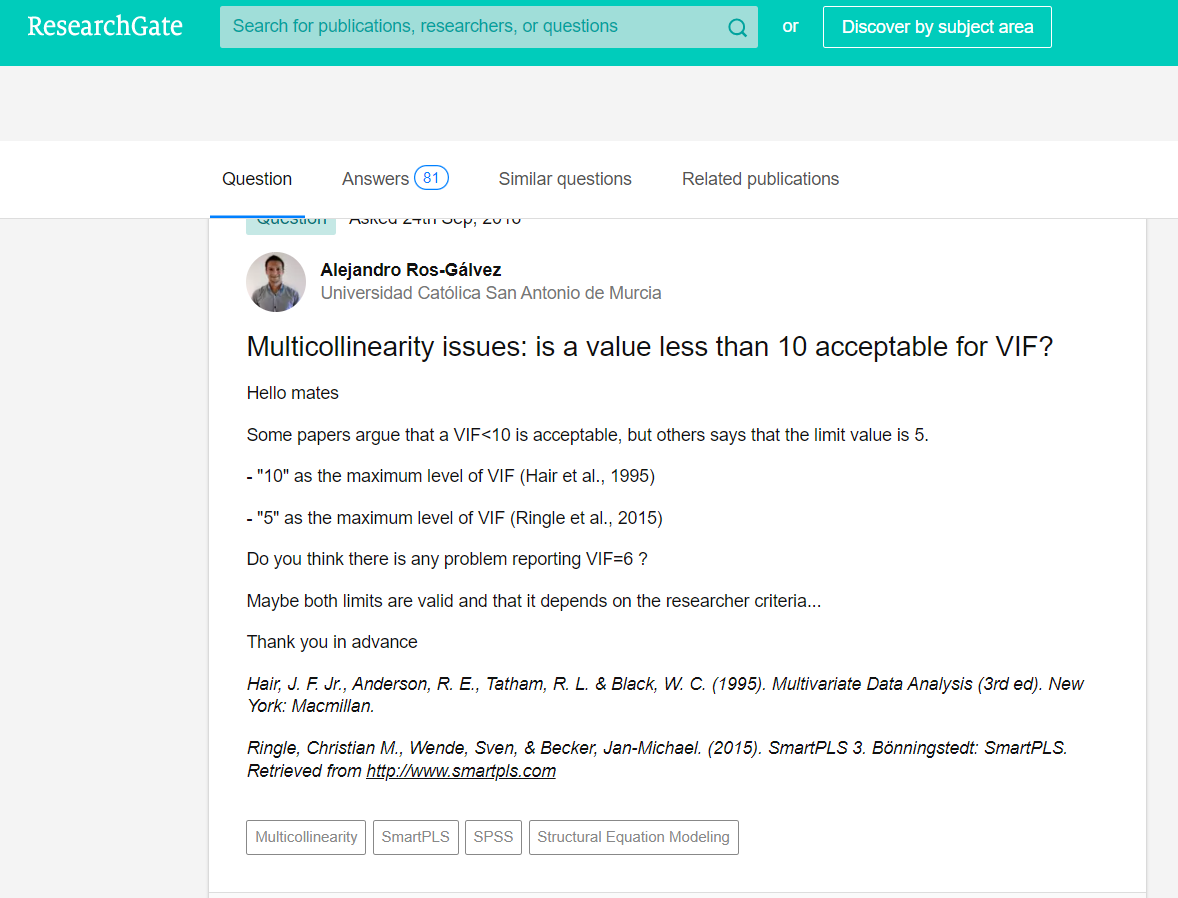

create new subset X train and X test with VIF lower or equal to 5

In [ ]:
x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
# x_train_vif_adj = X_train_new
x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
# x_test_vif_adj = X_test_new

In [ ]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [ ]:
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), 
                             param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)

In [ ]:
logModel_grid.fit(X_train_vif_adj_std,Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1234), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [ ]:
print(logModel_grid.best_estimator_)

LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='sag')


In [ ]:
Logit2=LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='sag')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Score of the model with X-train and Y-train is :  62.95 %
Score of the model with X-test and Y-test is :  62.92 %
 Mean absolute error is  0.37080684663859764
 Mean squared  error is  0.37080684663859764
 Median absolute error is  0.0
Accuracy is  62.92 %
F1 score:  62.56 %


an increase in score model even though not significant increase

In [ ]:
len(Y_train)

809840

In [ ]:
len(x_train_vif_adj)

809840

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[115846 102307]
 [ 59390 158525]]
Outcome values : 
 115846 102307 59390 158525
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.53      0.59    218153
           0       0.61      0.73      0.66    217915

    accuracy                           0.63    436068
   macro avg       0.63      0.63      0.63    436068
weighted avg       0.63      0.63      0.63    436068



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9879445407596981
 Mean absolute error is  0.012055459240301972
 Mean squared  error is  0.012055459240301972
 Median absolute error is  0.0
Accuracy score  0.9879445407596981
F1 score:  98.79 %


the model score is equal to 1which indicates an overfitting.

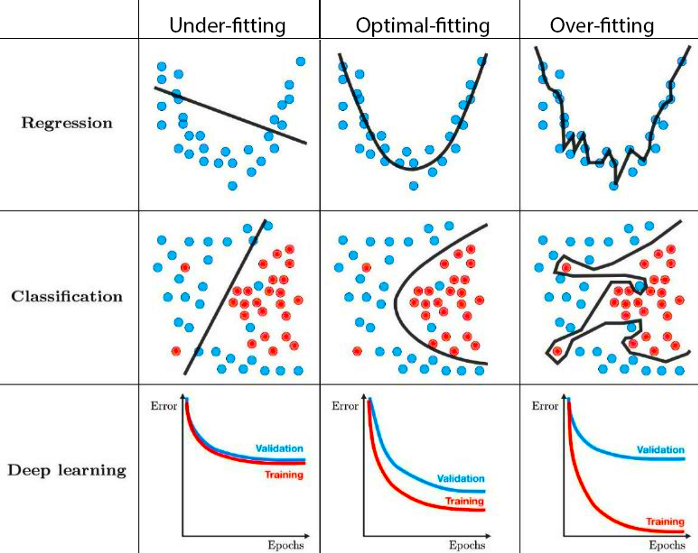

further feature importance and hyperparameter tuning is needed to decrease result from overfitting.

In [ ]:
featuredtc= pd.DataFrame()
featuredtc['column']= X_train.columns
featuredtc['importance']= dtc.feature_importances_
featuredtc.sort_values('importance', ascending=False, inplace=True)
featuredtc

,column,importance
2,transactionAmount,0.195258
10,accountOpenDate,0.090232
3,merchantName,0.088623
1,availableMoney,0.084198
9,currentExpDate,0.080823
12,currentBalance,0.080116
21,dayofyearlastchangeaddress,0.079726
17,transactiondayofyear,0.071696
6,posEntryMode,0.057981
8,merchantCategoryCode,0.046115


create new subset with the value of importance (decision tree classifier based) bigger than 0.05

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train_new=X_train[[x for x in featuredtc[featuredtc["importance"]>0.05].column]]
X_test_new=X_test[[x for x in featuredtc[featuredtc["importance"]>0.05].column]]

In [ ]:
dtc.fit(X_train_new,Y_train)
print("Score the X-train with Y-train is : ", dtc.score(X_train_new,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test_new,Y_test))

Y_pred=dtc.predict(X_test_new)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.991026663170793
 Mean absolute error is  0.008973336829206953
 Mean squared  error is  0.008973336829206953
 Median absolute error is  0.0
Accuracy score  0.991026663170793
F1 score:  99.1 %


**In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.**

In [ ]:
dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

halving_random_search=HalvingRandomSearchCV(estimator=dtc1,param_distributions = params_dtc,cv=5)
halving_random_search.fit(X_train,Y_train)
print(halving_random_search.best_params_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 250 is smaller than n_iter=52951. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 20, 'min_samples_leaf': 50, 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
dtc2 = DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 50, max_depth= 50, criterion= 'gini')
dtc2.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", dtc2.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc2.score(X_test,Y_test))

Y_pred=dtc2.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.92355203532319
Score the X-test  with Y-test  is :  0.9148255362866331
 Mean absolute error is  0.0851744637133669
 Mean squared  error is  0.0851744637133669
 Median absolute error is  0.0
Accuracy score  0.9148255362866331
F1 score:  91.46 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[90486  2841]
 [13077 80483]]
Outcome values : 
 90486 2841 13077 80483
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.97      0.92     93327
           0       0.97      0.86      0.91     93560

    accuracy                           0.91    186887
   macro avg       0.92      0.91      0.91    186887
weighted avg       0.92      0.91      0.91    186887



based on logistic regression, we find the important value that impacting the transaction fraud or legitimate are :
- currentExpDate
- dayofyearlastchangeaddress
- daylastchangeaddress
- transactionday
- creditLimit
- currentBalance
- transactionAmount
- posEntryMode
- posConditionCode

while in decision tree, the important value are :
- transactionAmount
- accountOpenDate
- merchantName
- availableMoney
- currentExpDate
- currentBalance
- dayofyearlastchangeaddress
- transactiondayofyear
- posEntryMode

talking about the most optimal parameters for the logistic regression is :

```LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234, solver='sag')```

the most optimal parameters for decision tree is :

```DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 50, max_depth= 50, criterion= 'gini')```